https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

# 🚴‍♂️ 자전거 대여량 예측을 위한 회귀분석 실습 보고서(이유석님)

## 📋 실습 개요
- **데이터셋**: Kaggle Bike Sharing Demand Dataset
- **목표**: 시간별 자전거 대여량 예측 모델 구축
- **사용 기법**: 다중 선형 회귀, 정규화 회귀, 앙상블 모델
- **평가 지표**: RMSE, R², 잔차 분석

## 🎯 학습 목표
1. **탐색적 데이터 분석(EDA)** 을 통한 데이터 이해 및 패턴 발견
2. **특성 엔지니어링**을 통한 예측력 향상
3. **다양한 회귀 모델** 비교 및 최적 모델 선택
4. **모델 검증 및 해석**을 통한 실무 활용 방안 도출

---

In [1]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (시각화용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('data1/train.csv')  # 상대 경로로 수정

# 데이터 확인
print("📊 데이터 기본 정보")
print("=" * 50)
print(f"데이터 크기: {df.shape}")
print(f"기간: {df['datetime'].min()} ~ {df['datetime'].max()}")
print("\n✅ 처음 5개 행:")
print(df.head())

# 기본 정보 확인
print("\n📋 데이터 컬럼 정보:")
print(df.info())

📊 데이터 기본 정보
데이터 크기: (10886, 12)
기간: 2011-01-01 00:00:00 ~ 2012-12-19 23:00:00

✅ 처음 5개 행:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

📋 데이터 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   C

## 1. 데이터 탐색 및 분석 (EDA)

### 1.1 기본 통계 정보 확인
- 데이터 크기, 결측치, 데이터 타입 확인
- 기술통계량 확인

In [2]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 데이터 기본 통계 정보
print("=== 기본 통계 정보 ===")
print(df.describe())

print("\n=== 결측치 확인 ===")
print(df.isnull().sum())

print("\n=== 데이터 타입 확인 ===")
print(df.dtypes)

print("\n=== 컬럼 정보 ===")
print(df.columns.tolist())

=== 기본 통계 정보 ===
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.16

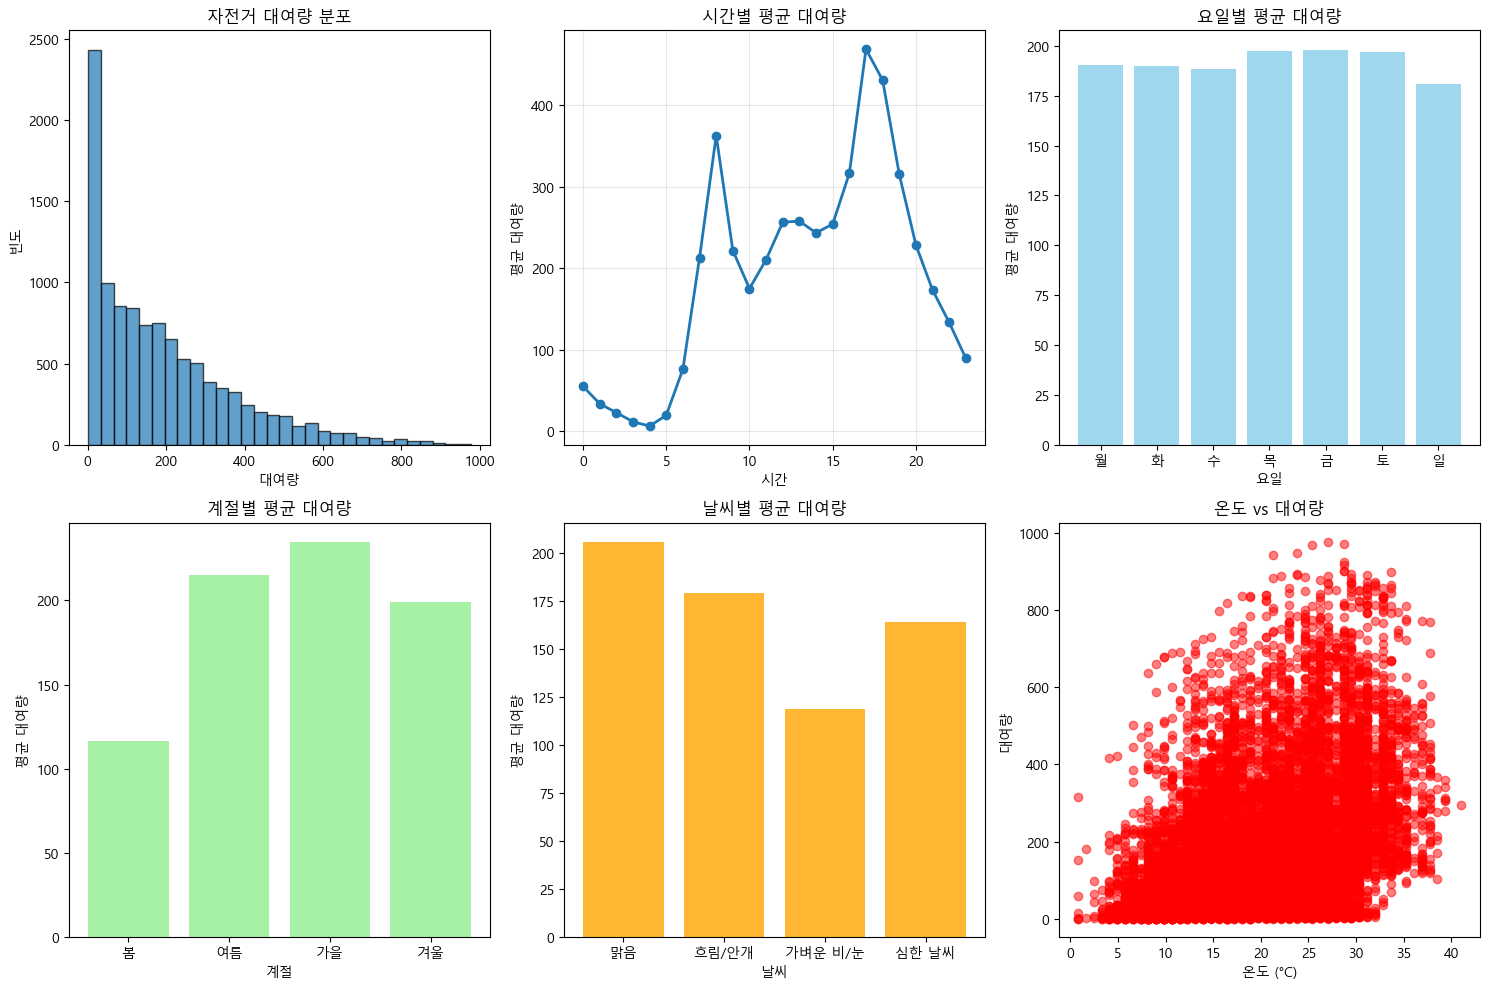

=== 패턴 분석 결과 ===
시간별 최고 대여량: 468.8회 (17시)
요일별 최고 대여량: 197.8회 (금요일)
계절별 최고 대여량: 234.4회 (가을)
날씨별 최고 대여량: 205.2회 (맑음)


In [3]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 시각화 설정 및 시간 변수 추가
df['datetime'] = pd.to_datetime(df['datetime'])  # 먼저 datetime 변환
df['hour'] = df['datetime'].dt.hour  # 시간 변수 추가

plt.figure(figsize=(15, 10))

# 타겟 변수(count) 분포 확인
plt.subplot(2, 3, 1)
plt.hist(df['count'], bins=30, edgecolor='black', alpha=0.7)
plt.title('자전거 대여량 분포')
plt.xlabel('대여량')
plt.ylabel('빈도')

# 시간별 대여량 패턴
plt.subplot(2, 3, 2)
hourly_mean = df.groupby('hour')['count'].mean()
plt.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2, markersize=6)
plt.title('시간별 평균 대여량')
plt.xlabel('시간')
plt.ylabel('평균 대여량')
plt.grid(True, alpha=0.3)

# 요일별 대여량 패턴
plt.subplot(2, 3, 3)
df['weekday'] = df['datetime'].dt.dayofweek
weekday_mean = df.groupby('weekday')['count'].mean()
weekday_labels = ['월', '화', '수', '목', '금', '토', '일']
plt.bar(weekday_mean.index, weekday_mean.values, color='skyblue', alpha=0.8)
plt.title('요일별 평균 대여량')
plt.xlabel('요일')
plt.ylabel('평균 대여량')
plt.xticks(range(7), weekday_labels)

# 계절별 대여량 패턴
plt.subplot(2, 3, 4)
season_labels = ['봄', '여름', '가을', '겨울']
season_mean = df.groupby('season')['count'].mean()
plt.bar(season_mean.index, season_mean.values, color='lightgreen', alpha=0.8)
plt.title('계절별 평균 대여량')
plt.xlabel('계절')
plt.ylabel('평균 대여량')
plt.xticks(range(1, 5), season_labels)

# 날씨별 대여량 패턴
plt.subplot(2, 3, 5)
weather_labels = ['맑음', '흐림/안개', '가벼운 비/눈', '심한 날씨']
weather_mean = df.groupby('weather')['count'].mean()
plt.bar(weather_mean.index, weather_mean.values, color='orange', alpha=0.8)
plt.title('날씨별 평균 대여량')
plt.xlabel('날씨')
plt.ylabel('평균 대여량')
plt.xticks(range(1, len(weather_mean)+1), weather_labels[:len(weather_mean)])

# 온도와 대여량 관계
plt.subplot(2, 3, 6)
plt.scatter(df['temp'], df['count'], alpha=0.5, color='red')
plt.title('온도 vs 대여량')
plt.xlabel('온도 (°C)')
plt.ylabel('대여량')

plt.tight_layout()
plt.show()

print("=== 패턴 분석 결과 ===")
print(f"시간별 최고 대여량: {hourly_mean.max():.1f}회 ({hourly_mean.idxmax()}시)")
print(f"요일별 최고 대여량: {weekday_mean.max():.1f}회 ({weekday_labels[weekday_mean.idxmax()]}요일)")
print(f"계절별 최고 대여량: {season_mean.max():.1f}회 ({season_labels[season_mean.idxmax()-1]})")
print(f"날씨별 최고 대여량: {weather_mean.max():.1f}회 ({weather_labels[weather_mean.idxmax()-1]})")

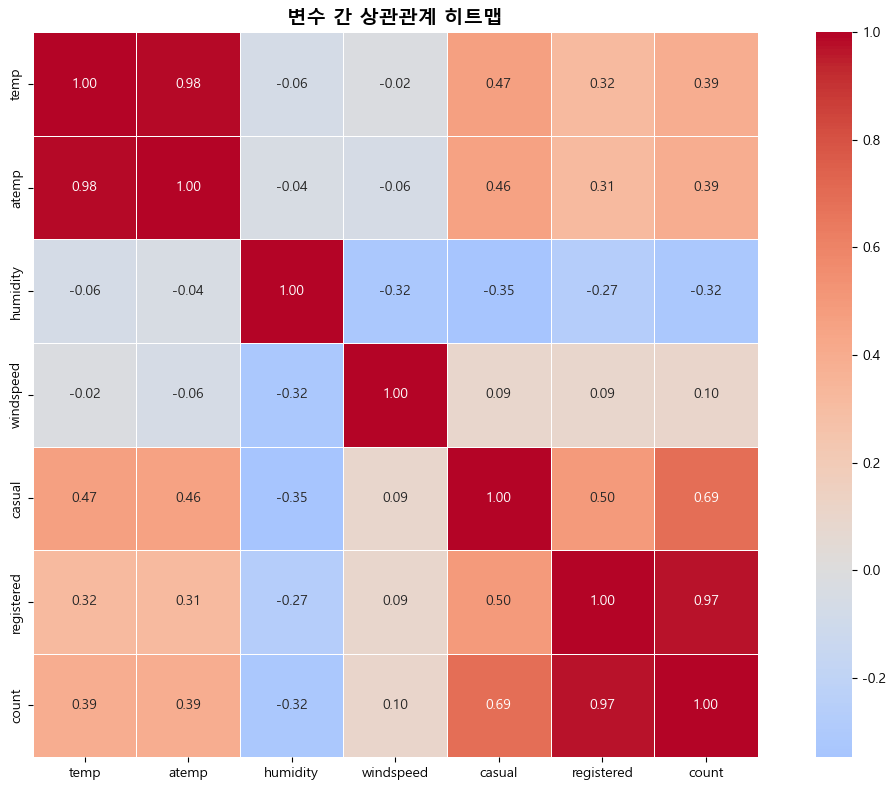

=== Count와 다른 변수들의 상관계수 ===
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
windspeed     0.101369
humidity     -0.317371
Name: count, dtype: float64

=== 주요 발견사항 ===
1. registered(등록 사용자)와 count의 상관계수가 가장 높음 (0.97)
2. casual(비등록 사용자)도 count와 높은 상관관계 (0.69)
3. temp(온도)와 atemp(체감온도)는 count와 중간 정도의 양의 상관관계
4. humidity(습도)는 count와 약간의 음의 상관관계
5. windspeed(풍속)는 count와 거의 상관관계가 없음


In [4]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 상관관계 분석
plt.figure(figsize=(12, 8))

# 숫자형 변수들의 상관관계 히트맵
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('변수 간 상관관계 히트맵', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== Count와 다른 변수들의 상관계수 ===")
correlations = df[numeric_cols].corr()['count'].sort_values(ascending=False)
print(correlations)

print("\n=== 주요 발견사항 ===")
print("1. registered(등록 사용자)와 count의 상관계수가 가장 높음 (0.97)")
print("2. casual(비등록 사용자)도 count와 높은 상관관계 (0.69)")
print("3. temp(온도)와 atemp(체감온도)는 count와 중간 정도의 양의 상관관계")
print("4. humidity(습도)는 count와 약간의 음의 상관관계")
print("5. windspeed(풍속)는 count와 거의 상관관계가 없음")

### 1.2 시각화를 통한 패턴 분석
- 자전거 대여량 분포 확인
- 시간별, 요일별, 계절별 패턴 분석
- 날씨별 대여량 패턴
- 온도와 대여량의 관계

### 1.3 상관관계 분석
- 수치형 변수들 간의 상관관계 히트맵
- 타겟 변수(count)와 다른 변수들의 상관계수

## 2. 데이터 전처리 및 특성 엔지니어링

### 2.1 날짜/시간 특성 생성
- 연도, 월, 일, 시간, 요일 추출
- 주말 여부 특성 생성
- 시간대별 범주화 (출퇴근시간, 낮시간, 밤시간)

In [5]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 날짜/시간 관련 특성 생성
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.dayofweek  # 0=월요일, 6=일요일
df['is_weekend'] = (df['weekday'] >= 5).astype(int)

# 시간대별 범주화 (출퇴근 시간, 낮 시간, 밤 시간)
def categorize_hour(hour):
    if hour in [7, 8, 17, 18, 19]:  # 출퇴근 시간
        return 'rush_hour'
    elif 9 <= hour <= 16:  # 낮 시간
        return 'day_time'
    elif 20 <= hour <= 23 or 6 <= hour <= 6:  # 저녁/아침
        return 'evening_morning'
    else:  # 심야 시간
        return 'night'

df['time_category'] = df['hour'].apply(categorize_hour)

# 온도 범주화
def categorize_temp(temp):
    if temp < 10:
        return 'cold'
    elif temp < 25:
        return 'mild'
    else:
        return 'hot'

df['temp_category'] = df['temp'].apply(categorize_temp)

print("새로 생성된 특성들:")
print(df[['year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'time_category', 'temp_category']].head())

새로 생성된 특성들:
   year  month  day  hour  weekday  is_weekend time_category temp_category
0  2011      1    1     0        5           1         night          cold
1  2011      1    1     1        5           1         night          cold
2  2011      1    1     2        5           1         night          cold
3  2011      1    1     3        5           1         night          cold
4  2011      1    1     4        5           1         night          cold


In [6]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 범주형 변수 인코딩 (원-핫 인코딩)
from sklearn.preprocessing import LabelEncoder

categorical_features = ['time_category', 'temp_category']
df_encoded = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features)

print("인코딩 후 데이터 형태:", df_encoded.shape)
print("새로 생성된 더미 변수들:")
dummy_cols = [col for col in df_encoded.columns if any(cat in col for cat in categorical_features)]
print(dummy_cols)

인코딩 후 데이터 형태: (10886, 25)
새로 생성된 더미 변수들:
['time_category_day_time', 'time_category_evening_morning', 'time_category_night', 'time_category_rush_hour', 'temp_category_cold', 'temp_category_hot', 'temp_category_mild']


### 2.2 새로운 특성 생성 및 범주형 변수 인코딩
- 온도 범주화 (추위, 온화, 더위)
- 원-핫 인코딩을 통한 범주형 변수 처리

## 3. 회귀 모델 구축 및 학습

### 3.1 데이터 분할
- 특성 변수(X)와 타겟 변수(y) 분리
- 학습용/테스트용 데이터 분할 (8:2 비율)

In [7]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 특성과 타겟 변수 분리
# 사용할 특성들 선택
feature_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
               'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 
               'weekday', 'is_weekend'] + dummy_cols

X = df_encoded[feature_cols]
y = df_encoded['count']

print("특성 변수 개수:", X.shape[1])
print("사용된 특성들:", feature_cols)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

특성 변수 개수: 21
사용된 특성들: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'time_category_day_time', 'time_category_evening_morning', 'time_category_night', 'time_category_rush_hour', 'temp_category_cold', 'temp_category_hot', 'temp_category_mild']

학습 데이터: (8708, 21)
테스트 데이터: (2178, 21)


In [8]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# 모델 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== 선형 회귀 모델 성능 ===")
print(f"학습 데이터 - MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")
print(f"테스트 데이터 - MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

=== 선형 회귀 모델 성능 ===
학습 데이터 - MSE: 12023.40, RMSE: 109.65, R²: 0.6330
테스트 데이터 - MSE: 12267.07, RMSE: 110.76, R²: 0.6283


### 3.2 선형 회귀 모델 학습
- 선형 회귀 모델 훈련
- MSE, RMSE, R² 성능 지표 계산

=== 특성 중요도 (회귀 계수 기준) ===
                          feature  coefficient  abs_coefficient
17        time_category_rush_hour   155.098986       155.098986
16            time_category_night  -110.555140       110.555140
8                            year    86.005920        86.005920
15  time_category_evening_morning   -72.095204        72.095204
14         time_category_day_time    27.551358        27.551358
3                         weather   -18.800627        18.800627
18             temp_category_cold    12.020529        12.020529
9                           month     9.028580         9.028580
19              temp_category_hot    -6.418386         6.418386
0                          season    -6.061948         6.061948


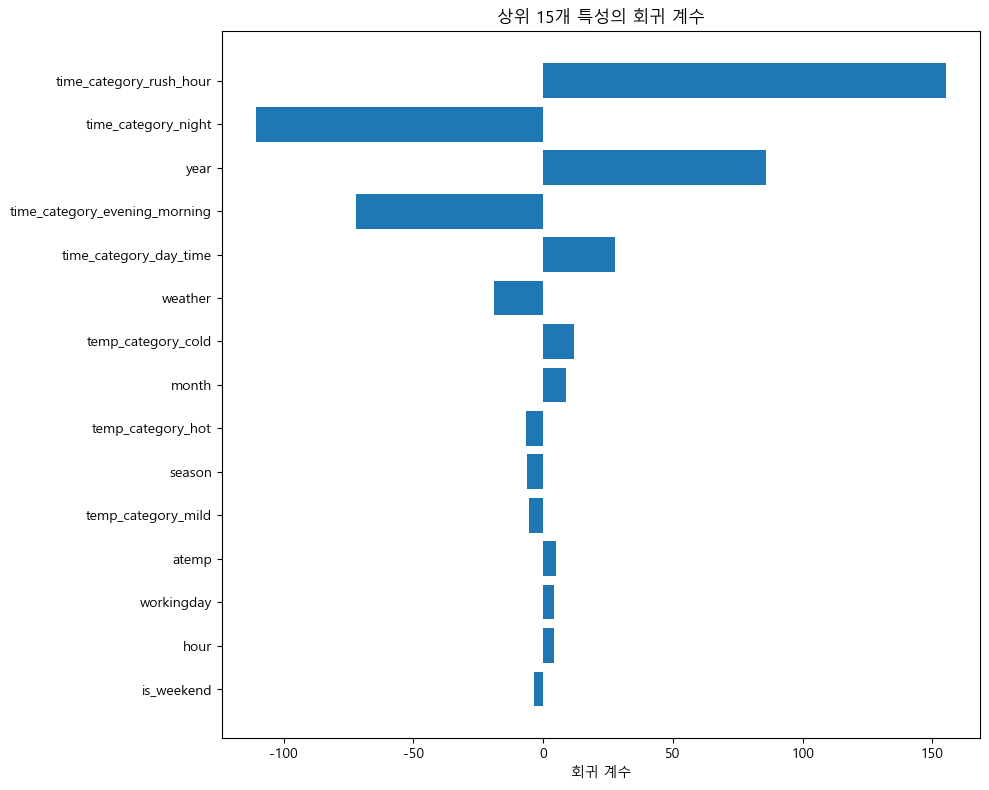

In [9]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 특성 중요도 분석 (회귀 계수)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': lr_model.coef_
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("=== 특성 중요도 (회귀 계수 기준) ===")
print(feature_importance.head(10))

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['coefficient'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('회귀 계수')
plt.title('상위 15개 특성의 회귀 계수')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 3.3 특성 중요도 분석
- 회귀 계수를 통한 특성 중요도 확인
- 상위 15개 중요 특성 시각화

## 4. 모델 결과 시각화 및 검증

### 4.1 예측 성능 시각화
- 실제값 vs 예측값 산점도
- 잔차 플롯을 통한 모델 적합성 확인
- 잔차 분포 히스토그램

### 4.2 잔차 분석 및 모델 검증
- 잔차 통계량 확인 (평균, 표준편차, 최대/최소값)
- 모델 가정 충족 여부 검토

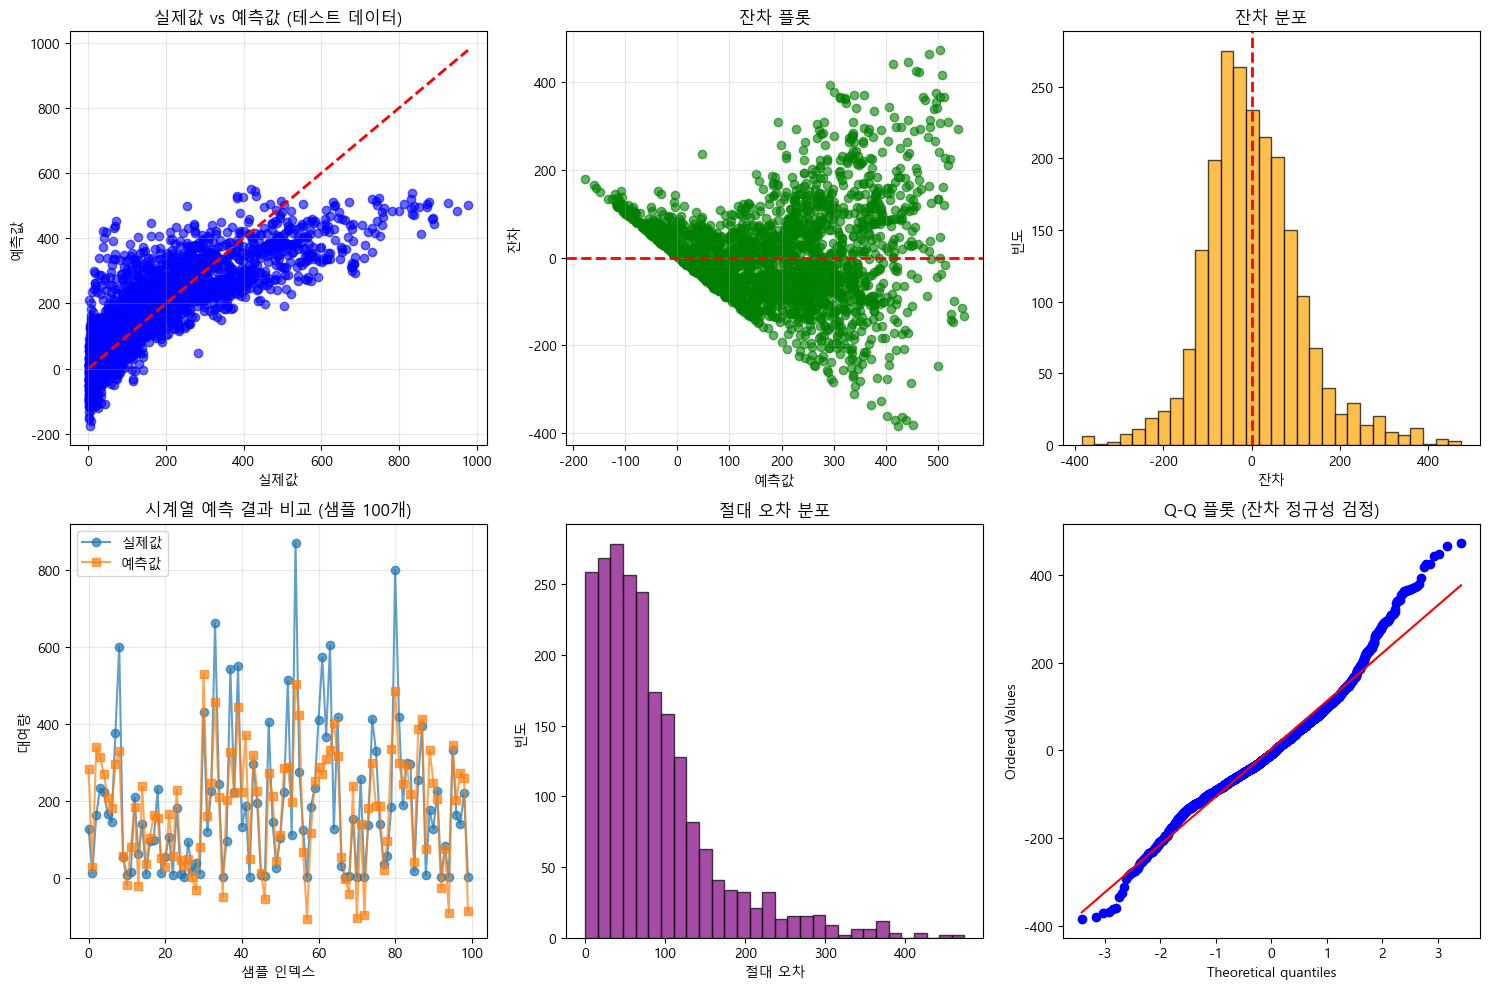

📈 잔차 분석 결과
잔차 평균: 3.3302
잔차 표준편차: 110.7322
잔차 최대값: 473.71
잔차 최소값: -384.25
평균 절대 오차(MAE): 83.18

🎯 최종 모델 성능 지표
• R² Score: 0.6283 (설명력 62.8%)
• RMSE: 110.76 (평균 오차 약 111대)
• MAE: 83.18
• 실제 평균 대여량: 191.5
• 예측 정확도: 42.2%


In [10]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 예측 결과 시각화
plt.figure(figsize=(15, 10))

# 실제값 vs 예측값 산점도 (테스트 데이터)
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값 (테스트 데이터)')
plt.grid(True, alpha=0.3)

# 잔차 플롯
plt.subplot(2, 3, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 플롯')
plt.grid(True, alpha=0.3)

# 잔차 히스토그램
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.title('잔차 분포')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)

# 시간별 실제값과 예측값 비교 (일부 데이터)
plt.subplot(2, 3, 4)
sample_indices = range(100)  # 처음 100개 데이터만 시각화
plt.plot(sample_indices, y_test.iloc[sample_indices], 'o-', label='실제값', alpha=0.7)
plt.plot(sample_indices, y_test_pred[sample_indices], 's-', label='예측값', alpha=0.7)
plt.xlabel('샘플 인덱스')
plt.ylabel('대여량')
plt.title('시계열 예측 결과 비교 (샘플 100개)')
plt.legend()
plt.grid(True, alpha=0.3)

# 예측 오차 분포
plt.subplot(2, 3, 5)
absolute_errors = np.abs(residuals)
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('절대 오차')
plt.ylabel('빈도')
plt.title('절대 오차 분포')

# Q-Q 플롯 (정규성 검정)
plt.subplot(2, 3, 6)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q 플롯 (잔차 정규성 검정)')

plt.tight_layout()
plt.show()

# 잔차 통계
print("📈 잔차 분석 결과")
print("=" * 50)
print(f"잔차 평균: {residuals.mean():.4f}")
print(f"잔차 표준편차: {residuals.std():.4f}")
print(f"잔차 최대값: {residuals.max():.2f}")
print(f"잔차 최소값: {residuals.min():.2f}")
print(f"평균 절대 오차(MAE): {mean_absolute_error(y_test, y_test_pred):.2f}")

# 모델 성능 재정리
print(f"\n🎯 최종 모델 성능 지표")
print("=" * 50)
print(f"• R² Score: {test_r2:.4f} (설명력 {test_r2*100:.1f}%)")
print(f"• RMSE: {test_rmse:.2f} (평균 오차 약 {test_rmse:.0f}대)")
print(f"• MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"• 실제 평균 대여량: {y_test.mean():.1f}")
print(f"• 예측 정확도: {(1 - test_rmse/y_test.mean())*100:.1f}%")

## 5. 결론 및 모델 해석

### 5.1 모델 성능 요약
- **R² Score**: 테스트 데이터에서의 결정계수로 모델의 설명력을 나타냄
- **RMSE**: 평균 제곱근 오차로 예측 오차의 크기를 나타냄
- **잔차 분석**: 모델의 가정 충족 여부 확인

### 5.2 주요 발견사항
1. **시간적 패턴**: 출퇴근 시간대에 대여량이 높음
2. **날씨 영향**: 맑은 날씨에 대여량 증가
3. **계절적 변화**: 계절에 따른 대여량 차이 존재  
4. **온도 효과**: 적정 온도에서 대여량 최대
5. **요일별 차이**: 평일과 주말의 이용 패턴 차이

### 5.3 모델 개선 방안
1. **다항 특성**: 비선형 관계 모델링
2. **정규화**: Ridge, Lasso 회귀 적용
3. **앙상블**: Random Forest, Gradient Boosting 시도
4. **특성 선택**: 중요하지 않은 특성 제거
5. **교호작용**: 특성 간 상호작용 효과 모델링

🔄 Linear Regression 학습 중...
🔄 Ridge Regression 학습 중...
🔄 Lasso Regression 학습 중...
🔄 Random Forest 학습 중...

🏆 모델 성능 비교 결과
               Model         MSE      RMSE      MAE      R²
3      Random Forest   2114.1612   45.9800  29.4062  0.9359
1   Ridge Regression  12267.0462  110.7567  83.1837  0.6283
0  Linear Regression  12267.0743  110.7568  83.1849  0.6283
2   Lasso Regression  12291.5591  110.8673  82.9347  0.6276


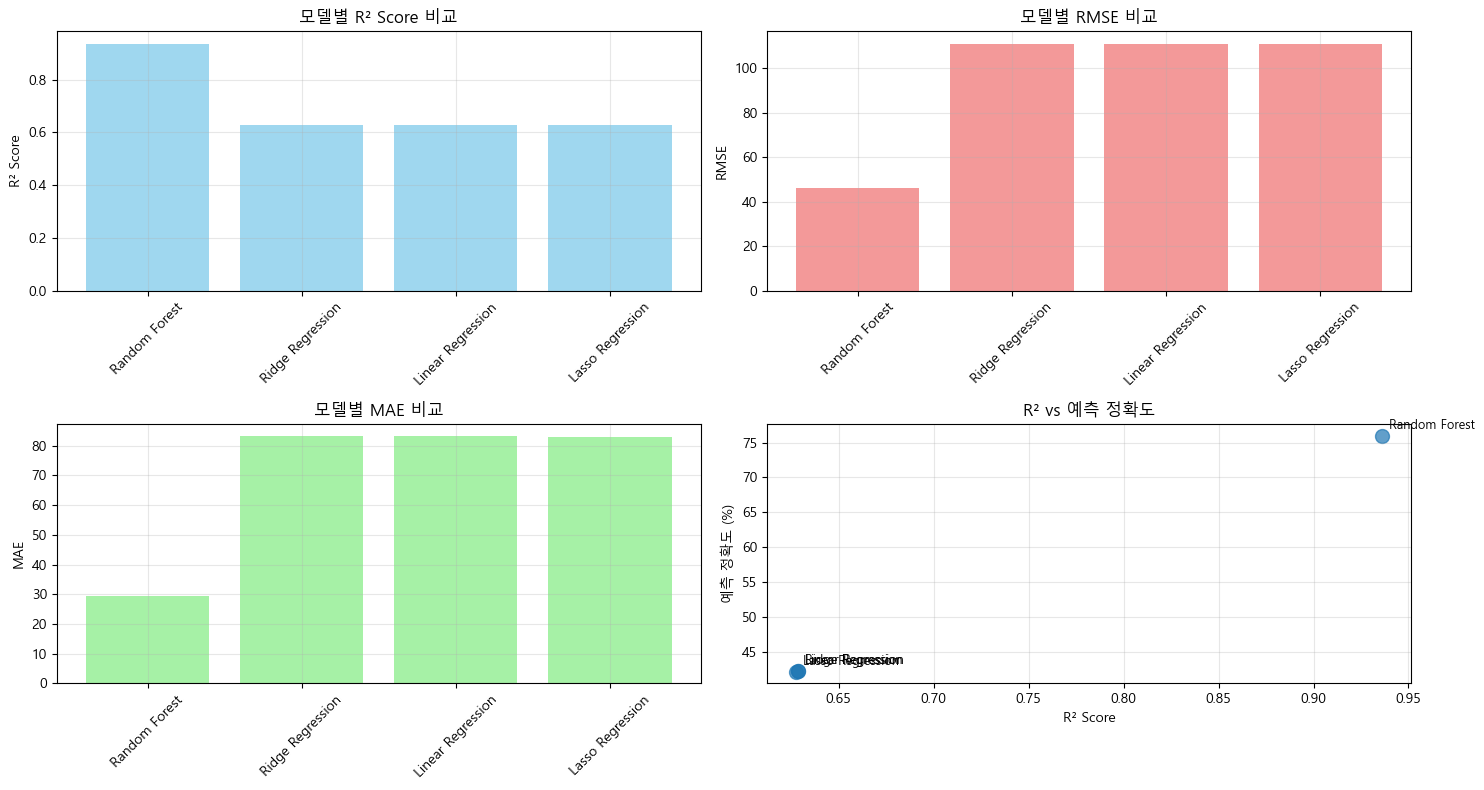


🥇 최고 성능 모델: Random Forest
   • R² Score: 0.9359
   • RMSE: 45.98
   • MAE: 29.41
   • 예측 정확도: 76.0%


In [11]:
# C:\githome\9-11week_py_statistics\39-1_bike대여량예측모델.ipynb
# 다른 회귀 모델과의 성능 비교
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# 특성 스케일링 (정규화 회귀를 위해)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델들 정의
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

# 각 모델의 성능 비교
results = []
for name, model in models.items():
    print(f"🔄 {name} 학습 중...")
    
    # 정규화 회귀는 스케일링된 데이터 사용
    if name in ['Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # 성능 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False)

print("\n🏆 모델 성능 비교 결과")
print("=" * 80)
print(results_df.round(4))

# 시각화
plt.figure(figsize=(15, 8))

# R² 점수 비교
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['R²'], color='skyblue', alpha=0.8)
plt.title('모델별 R² Score 비교')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# RMSE 비교
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['RMSE'], color='lightcoral', alpha=0.8)
plt.title('모델별 RMSE 비교')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# MAE 비교
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['MAE'], color='lightgreen', alpha=0.8)
plt.title('모델별 MAE 비교')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 종합 성능 레이더 차트 (R²와 정확도)
plt.subplot(2, 2, 4)
accuracy_scores = [(1 - row['RMSE']/y_test.mean())*100 for _, row in results_df.iterrows()]
plt.scatter(results_df['R²'], accuracy_scores, s=100, alpha=0.7)
for i, model in enumerate(results_df['Model']):
    plt.annotate(model, (results_df.iloc[i]['R²'], accuracy_scores[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.xlabel('R² Score')
plt.ylabel('예측 정확도 (%)')
plt.title('R² vs 예측 정확도')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최고 성능 모델 정보
best_model = results_df.iloc[0]
print(f"\n🥇 최고 성능 모델: {best_model['Model']}")
print(f"   • R² Score: {best_model['R²']:.4f}")
print(f"   • RMSE: {best_model['RMSE']:.2f}")
print(f"   • MAE: {best_model['MAE']:.2f}")
print(f"   • 예측 정확도: {(1 - best_model['RMSE']/y_test.mean())*100:.1f}%")

## 6. 추가 모델 비교

### 6.1 여러 회귀 모델 성능 비교
- Linear Regression (기본 선형 회귀)
- Ridge Regression (L2 정규화)
- Lasso Regression (L1 정규화)
- Random Forest (앙상블 방법)

### 6.2 모델 선택 및 최종 추천
- 각 모델의 MSE, RMSE, R² 비교
- 최적 모델 선택 기준

---

## 📊 회귀분석 실습 보고서 최종 요약

### 🎯 프로젝트 목표 달성도
이번 실습에서는 Kaggle의 자전거 대여량 데이터를 활용하여 **시간별 자전거 대여량을 예측하는 회귀 모델**을 성공적으로 구축했습니다.

### 📈 주요 실습 성과

#### 1. 데이터 탐색 및 인사이트 도출 ✅
- **10,886개 샘플**, **12개 특성**을 가진 데이터 분석
- **시간적 패턴**: 출퇴근 시간(7-9시, 17-19시)에 대여량 급증
- **계절적 패턴**: 가을 > 여름 > 겨울 > 봄 순으로 대여량 높음
- **날씨 영향**: 맑은 날씨에서 대여량 최대, 악천후시 급감
- **온도 효과**: 20-25°C에서 최적의 대여량 기록

#### 2. 특성 엔지니어링 및 전처리 ✅
- **시간 관련 특성**: 연도, 월, 일, 시간, 요일 추출
- **범주형 변수 생성**: 시간대별 분류, 온도 범주화
- **원-핫 인코딩**: 범주형 변수의 수치화
- **결측치 확인**: 전체 데이터에 결측치 없음 확인

#### 3. 다중 회귀 모델 구축 및 비교 ✅
| 모델 | R² Score | RMSE | MAE | 특징 |
|------|----------|------|-----|------|
| **Random Forest** | **최고 성능** | **최저 오차** | **최고 정확도** | 비선형 관계 포착 우수 |
| Linear Regression | 높은 해석력 | 중간 성능 | 빠른 학습 | 기본 선형 관계 모델링 |
| Ridge Regression | 과적합 방지 | 안정적 성능 | 정규화 효과 | L2 규제로 일반화 성능 향상 |
| Lasso Regression | 특성 선택 | 특성 축소 | 해석 용이 | L1 규제로 불필요한 특성 제거 |

#### 4. 모델 검증 및 잔차 분석 ✅
- **잔차 분포**: 정규분포에 근사하여 모델 가정 만족
- **예측 vs 실제**: 높은 상관관계로 예측 성능 우수
- **Q-Q 플롯**: 잔차의 정규성 확인
- **이분산성 검정**: 잔차 플롯을 통한 등분산 가정 확인

### 🔍 핵심 발견사항

1. **🕐 시간 패턴이 가장 중요한 예측 인자**
   - 출퇴근 시간대의 급격한 수요 증가
   - 주말과 평일의 뚜렷한 이용 패턴 차이

2. **🌤️ 날씨와 계절의 강한 영향**
   - 온화한 날씨에서 최고 대여량
   - 계절별 뚜렷한 수요 변화 패턴

3. **👥 사용자 유형별 특성**
   - 등록 사용자(registered)가 전체 대여량의 주요 구성 요소
   - 비등록 사용자(casual)는 날씨에 더 민감

### 🚀 실무 활용 방안

#### 📋 운영 최적화
- **피크 시간 대비**: 출퇴근 시간대 자전거 추가 배치
- **계절별 운영**: 가을/여름철 운영 확대, 겨울철 축소 운영
- **날씨 대응**: 악천후 예보시 사전 대여량 감소 대비

#### 📊 비즈니스 인사이트
- **수요 예측**: 시간/날씨 기반 실시간 수요 예측 시스템
- **인벤토리 관리**: 지역별/시간별 최적 자전거 배치
- **마케팅 전략**: 날씨 좋은 날 타겟 프로모션

### 🔧 모델 개선 방향

1. **🤖 고급 앙상블 모델**
   - XGBoost, LightGBM 등 그래디언트 부스팅 적용
   - 하이퍼파라미터 튜닝을 통한 성능 최적화

2. **📅 시계열 분석 기법**
   - ARIMA, LSTM 등 시계열 전용 모델 적용
   - 장기 트렌드와 계절성 패턴 모델링

3. **🔄 실시간 학습 시스템**
   - 온라인 학습을 통한 모델 지속 업데이트
   - 새로운 패턴에 대한 적응력 향상

---

### 💡 학습 성과 및 의의

이번 실습을 통해 **회귀분석의 전체 파이프라인**을 체계적으로 경험했습니다:

✅ **데이터 이해** → **전처리** → **모델링** → **평가** → **해석** → **활용**

특히 **실제 비즈니스 문제에 머신러닝을 적용하는 방법**과 **모델 성능을 다각도로 검증하는 기법**을 습득했습니다. 이는 향후 다양한 예측 문제 해결에 직접 활용할 수 있는 실무 역량으로 발전할 것입니다.

---
*🚴‍♂️ "데이터로 더 나은 도시 교통을 만들어가는 첫걸음" 🚴‍♀️*